Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not



In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb

In [4]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head(10)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [ ]:
fraud.isnull().sum()

In [ ]:
fraud.Urban.value_counts()

In [ ]:
fraud.info()

In [ ]:
fraud['Taxable_Income'].describe()

In [5]:
#so according to question i m adding a column 0r feature as Taxable_Income_new where

# Use decision trees to prepare a model on fraud data treating those who have 
# taxable_income <= 30000 as "Risky" and others are "Good

Taxable_Income_new = [] 
for value in fraud["Taxable_Income"]: 
    if value <= 30000: 
        Taxable_Income_new.append("Risky") 
    
    else:
        Taxable_Income_new.append("Good")
       
fraud["Taxable_Income_new"] = Taxable_Income_new    
 
fraud.head(10)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_new
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [6]:
fraud = fraud.drop(['Taxable_Income'], axis=1)
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_new
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [ ]:
sb.countplot(x="Undergrad",data=fraud,palette="hls",hue="Undergrad")
plt.show()

In [ ]:
sb.countplot(x="Marital_Status",data=fraud,palette="hls",hue="Marital_Status")
plt.show()

In [ ]:
sb.countplot(x="Urban",data=fraud,palette="hls",hue="Urban")
plt.show()

In [ ]:
sb.countplot(x="Taxable_Income_new",data=fraud,palette="hls",hue="Taxable_Income_new")
plt.show()

In [ ]:
plt.hist(fraud.City_Population, color="pink", edgecolor="black")
plt.title("City_Population")
plt.show()



In [ ]:
plt.hist(fraud.Work_Experience, color="blue", edgecolor="black")
plt.title("Work_Experience")
plt.show()


In [7]:
# Convert "yes" & "No" into "0" & "1"
fraud['Undergrad']=fraud['Undergrad'].apply(lambda x:0 if x=='no' else 1)
fraud['Urban']=fraud['Urban'].apply(lambda x:0 if x=='no' else 1)

fraud.head(10)

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_new
0,1,Single,50047,10,1,Good
1,1,Divorced,134075,18,1,Good
2,1,Married,160205,30,1,Good
3,1,Single,193264,15,1,Good
4,1,Married,27533,28,1,Good
5,1,Divorced,116382,0,1,Good
6,1,Divorced,80890,8,1,Good
7,1,Single,131253,3,1,Good
8,1,Single,102481,12,1,Good
9,1,Divorced,155482,4,1,Good


In [8]:
def value_converter(x):
    if x == 'Single':
        return 0
    if x == 'Married':
        return 1
    if x == 'Divorced':
        return 2
    
fraud['Marital_Status'] = fraud['Marital_Status'].apply(value_converter)
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_new
0,1,0,50047,10,1,Good
1,1,2,134075,18,1,Good
2,1,1,160205,30,1,Good
3,1,0,193264,15,1,Good
4,1,1,27533,28,1,Good
...,...,...,...,...,...,...
595,1,2,39492,7,1,Good
596,1,2,55369,2,1,Good
597,1,2,154058,0,1,Good
598,1,1,180083,17,1,Good


In [9]:
colnames = list(fraud.columns)
x = colnames[:5]
y = colnames[5]

In [ ]:
#x
#y

In [ ]:
#x = fraud.iloc[:,0:5]
#y = fraud.iloc[:,5]

In [ ]:
x
y

In [10]:
# Splitting data into training and testing data set

from sklearn.model_selection import train_test_split
train,test = train_test_split(fraud,test_size=0.2)

In [11]:
train

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_new
334,1,0,118274,13,1,Good
180,1,0,149101,19,1,Good
593,1,2,131963,10,1,Good
480,1,2,72252,26,1,Good
285,1,0,63420,10,1,Good
...,...,...,...,...,...,...
138,1,0,155335,25,1,Good
308,1,1,183445,30,1,Good
68,1,0,139642,5,1,Risky
411,1,1,46253,19,1,Good


In [12]:
test

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income_new
383,1,1,148246,5,1,Good
205,1,1,131906,20,1,Risky
149,1,0,49505,25,1,Good
358,1,0,96432,24,1,Good
437,1,1,117250,20,1,Risky
...,...,...,...,...,...,...
303,1,2,189061,13,1,Good
304,1,2,106757,23,1,Good
587,1,0,154677,26,1,Good
363,1,0,52584,7,1,Risky


In [13]:
from sklearn.tree import  DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0 )
# criterion = 'entropy' we can use gini as well


model.fit(train[x],train[y])


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
model.score(train[x],train[y])

0.8020833333333334

In [16]:
preds = model.predict(test[x]) # predicting on test data set 


[Text(334.8, 380.52, 'X[3] <= 22.5\nentropy = 0.726\nsamples = 480\nvalue = [383, 97]'),
 Text(167.4, 271.8, 'X[2] <= 192382.0\nentropy = 0.771\nsamples = 345\nvalue = [267, 78]'),
 Text(83.7, 163.07999999999998, 'X[2] <= 165088.0\nentropy = 0.754\nsamples = 332\nvalue = [260, 72]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.781\nsamples = 289\nvalue = [222, 67]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.519\nsamples = 43\nvalue = [38, 5]'),
 Text(251.10000000000002, 163.07999999999998, 'X[3] <= 12.0\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 26.5\nentropy = 0.586\nsamples = 135\nvalue = [116, 19]'),
 Text(418.5, 163.07999999999998, 'X[2] <= 93616.0\nentropy = 0.381\nsamples = 54\nvalue = [50, 4]'),
 Text(376.65000000000003, 54.360000000000014, 'entrop

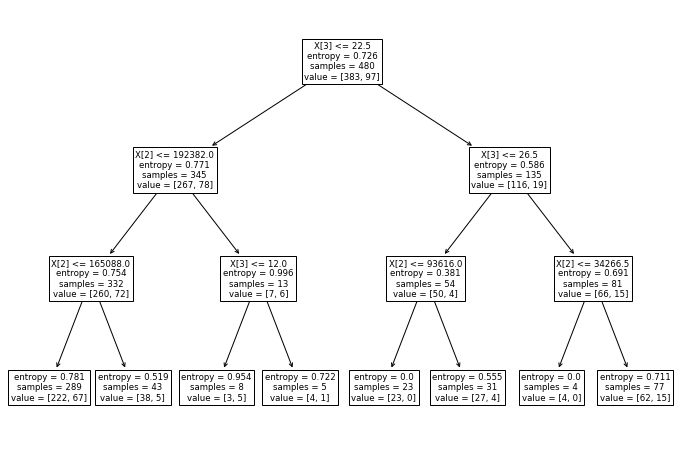

In [17]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(train[x],train[y]))

In [18]:
pd.Series(preds).value_counts() # getting the count of each category 

pd.crosstab(test[y],preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,Good,Risky
Taxable_Income_new,,
Good,92,1
Risky,27,0


In [19]:
# Accuracy 
np.mean(preds==test.Taxable_Income_new) 

0.7666666666666667

### Apply bagging technique to enhance accuracy

In [20]:
from sklearn.ensemble import BaggingClassifier

In [21]:
model1 = BaggingClassifier( DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0 ),n_estimators=13,max_samples=200,random_state=20)

model1.fit(train[x],train[y])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
       

In [22]:
model1.score(train[x],train[y])

0.8020833333333334

In [23]:
preds1 = model.predict(test[x]) # predicting on test data set 


In [24]:
pd.Series(preds1).value_counts() # getting the count of each category 

pd.crosstab(test[y],preds1) # getting the 2 way table to understand the correct and wrong predictions


col_0,Good,Risky
Taxable_Income_new,,
Good,92,1
Risky,27,0


In [25]:
# Accuracy 
np.mean(preds1==test.Taxable_Income_new) 

0.7666666666666667

## Applying Boosting technique

In [34]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score


In [44]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(n_estimators=100,learning_rate=0.2)
xgb1.fit(train[x],train[y])
train_pred = xgb1.predict(train[x])


In [45]:
import numpy as np
train_acc = np.mean(train_pred==train[y]) 
print(train_acc)

0.95


In [46]:
test_pred = xgb1.predict(test[x])
test_acc = np.mean(test_pred==test[y]) 
print(test_acc)

0.7333333333333333


In [ ]:
np.mean(test_pred==test.Taxable_)

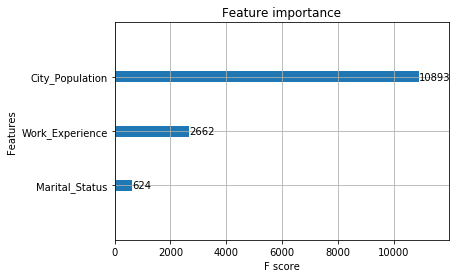

In [32]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)